## **Database reading**
- Load database of [Explosive Remnants of War in Colombia, 1982-2013](https://data.world/ocha-colombia/b6d4823e-af32-4549-a9d0-598057d0405a) from drive free access.

In [ ]:
FILEID = "1kMnn6FL_oVJY1FO7mmiBETsO9oQ0VgAE"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2021-09-07 00:18:30--  https://docs.google.com/uc?export=download&confirm=&id=1kMnn6FL_oVJY1FO7mmiBETsO9oQ0VgAE
Resolving docs.google.com (docs.google.com)... 172.217.2.110, 2607:f8b0:4004:80a::200e
Connecting to docs.google.com (docs.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-6c-docs.googleusercontent.com/docs/securesc/n2p0atf55d0gcobums2bfl05hk9dl8fp/70c9fq3n70lsrfcoe159ph1q0gf5o1m9/1630973850000/08249064296919175505/17827663676659502515Z/1kMnn6FL_oVJY1FO7mmiBETsO9oQ0VgAE?e=download [following]
--2021-09-07 00:18:31--  https://doc-0g-6c-docs.googleusercontent.com/docs/securesc/n2p0atf55d0gcobums2bfl05hk9dl8fp/70c9fq3n70lsrfcoe159ph1q0gf5o1m9/1630973850000/08249064296919175505/17827663676659502515Z/1kMnn6FL_oVJY1FO7mmiBETsO9oQ0VgAE?e=download
Resolving doc-0g-6c-docs.googleusercontent.com (doc-0g-6c-docs.googleusercontent.com)... 142.251.45.1, 2607:f8b0:4004:83e::2001
Connecting to doc-0g-6c-doc

- Reading - obtaining data.

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Xdata = pd.read_excel('minas2.xls')
col_drop = ["Corregimiento","Municipio","Pertenencia a un grupo etnico", "COD_DANE_MUNI", "COD_DANE_DEPTO", "Reporte medico"]
Xdata.drop(columns = col_drop, inplace = True)
Xdata.head()
Xdata


,Tipo de evento,Departamento,Año,Mes,Tipo de area,Rango de edad,Condicion,Estado,Genero,Latitud_cabecera,Longitud_cabecera
0,Accidente por MAP,ANTIOQUIA,2011,11,Rural,Mayor de 18 años,Fuerza pública,Herido,Masculino,7.161716,-75.446689
1,Accidente por MAP,ANTIOQUIA,2011,11,Rural,Mayor de 18 años,Fuerza pública,Herido,Masculino,7.161716,-75.446689
2,Accidente por MAP,HUILA,2011,11,Rural,Mayor de 18 años,Fuerza pública,Herido,Masculino,3.376472,-74.801107
3,Accidente por MAP,ANTIOQUIA,2005,5,Rural,Mayor de 18 años,Civil,Herido,Masculino,6.186462,-74.995778
4,Accidente por MAP,ANTIOQUIA,2010,5,Rural,Mayor de 18 años,Civil,Herido,Masculino,7.586691,-75.397995
...,...,...,...,...,...,...,...,...,...,...,...
10607,Accidente por MUSE,CAQUETA,2005,3,Rural,Mayor de 18 años,Civil,Herido,Masculino,1.576702,-75.343550
10608,Accidente por MAP,CAQUETA,2006,9,Rural,Mayor de 18 años,Civil,Herido,Femenino,1.494944,-75.463090
10609,Accidente por MAP,CAQUETA,2006,9,Rural,Menor de 18 años,Civil,Herido,Masculino,1.494944,-75.463090
10610,Accidente por MAP,CAQUETA,2011,1,Rural,Mayor de 18 años,Civil,Herido,Masculino,2.127945,-74.784713


- Next it is observed that there are 5 attributes that are of type 'object' (nominal) so it is necessary to make a preprocess on these to determine equivalence of type float.

In [ ]:
Xdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10612 entries, 0 to 10611
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de evento     10612 non-null  object 
 1   Departamento       10612 non-null  object 
 2   Año                10612 non-null  int64  
 3   Mes                10612 non-null  int64  
 4   Tipo de area       10612 non-null  object 
 5   Rango de edad      10612 non-null  object 
 6   Condicion          10612 non-null  object 
 7   Estado             10612 non-null  object 
 8   Genero             10612 non-null  object 
 9   Latitud_cabecera   10612 non-null  float64
 10  Longitud_cabecera  10612 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 912.1+ KB


## **Exploratory analysis and visualization on sampled data:**

##### Exploration

In [ ]:
dept = Xdata["Departamento"].value_counts()
years = Xdata["Año"].value_counts()

print(years)
print(dept)


2006    1235
2005    1182
2007     977
2004     897
2008     855
2003     757
2009     746
2002     632
2010     616
2011     550
2012     498
2013     359
2001     300
1992     151
2000     138
1995     130
1996     120
1997      96
1994      84
1993      84
1991      69
1998      58
1999      54
1990      22
1982       1
1984       1
Name: Año, dtype: int64
ANTIOQUIA             2346
META                  1076
CAQUETA                858
NORTE DE SANTANDER     751
NARIÑO                 737
BOLIVAR                598
ARAUCA                 567
CAUCA                  531
TOLIMA                 517
PUTUMAYO               350
SANTANDER              289
CORDOBA                254
VALLE DEL CAUCA        242
HUILA                  224
GUAVIARE               214
CALDAS                 173
CESAR                  155
CUNDINAMARCA           148
CHOCO                  101
CASANARE                90
BOYACA                  74
SUCRE                   72
LA GUAJIRA              56
MAGDALENA        

In [ ]:
canrols =Xdata["Genero"].unique()
canrols[0]

'Masculino'

In [ ]:
Xdata["Longitud_cabecera"].min(), Xdata["Longitud_cabecera"].max()

(-78.7639364297, -67.4716499176)

##### Preprocess categorical attributes

In [ ]:
cat = ['Tipo de evento', 'Estado','Rango de edad','Condicion', 'Genero', 'Tipo de area', 'Departamento'];
items = []
for i in cat:
    items += [list(Xdata[i].value_counts().index)]
cat_usr = dict(zip(cat, items))

In [ ]:
#%% dummy transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

class dummy_mines(BaseEstimator,TransformerMixin):
    #class initialization and varaibles
    def __init__(self, cat_usr):
      self.cat_usr = cat_usr #list of categorical attributes

    def fit(self,X, *_):
        Xi = X.copy() #copy dataset not to replace original
        cat = [] #coding categorical variables with ordinal encoder
        for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
        self.col_cat_usr = OrdinalEncoder(categories=cat)
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])

        return self

    def transform(self, X, *_):#transformer function
        Xi = X.copy()
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        #Xi[self.col_cat]= self.cod.transform(Xi[self.col_cat])
        return Xi

    def fit_transform(self,X,*_):

        self.fit(X)
        return self.transform(X)

- Preprocessing class is applied to Xdata.

In [ ]:
dummy = dummy_mines(cat_usr = cat_usr)
X = dummy.fit_transform(Xdata)

- It is observed that after preprocessing the attributes are of type float or int and the format has been corrected.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10612 entries, 0 to 10611
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de evento     10612 non-null  float64
 1   Departamento       10612 non-null  float64
 2   Año                10612 non-null  int64  
 3   Mes                10612 non-null  int64  
 4   Tipo de area       10612 non-null  float64
 5   Rango de edad      10612 non-null  float64
 6   Condicion          10612 non-null  float64
 7   Estado             10612 non-null  float64
 8   Genero             10612 non-null  float64
 9   Latitud_cabecera   10612 non-null  float64
 10  Longitud_cabecera  10612 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 912.1 KB


### **Interesting graphs**

##### Number of cases of MAP and MUSE per department

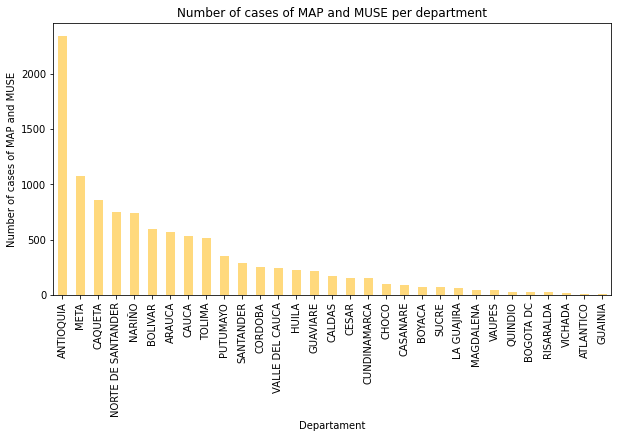

In [ ]:
plt.figure(figsize = (10,5))
colores = ["#FFD97D"] #"#60D394" green,"#FF9B85" pink "#EE6055" red, "#FFD97D" yellow
dept.plot(kind = 'bar',color = colores)
plt.xlabel('Departament')
plt.ylabel('Number of cases of MAP and MUSE')
plt.title('Number of cases of MAP and MUSE per department')
plt.show()

##### Number of MAP and MUSE cases per year and Histogram

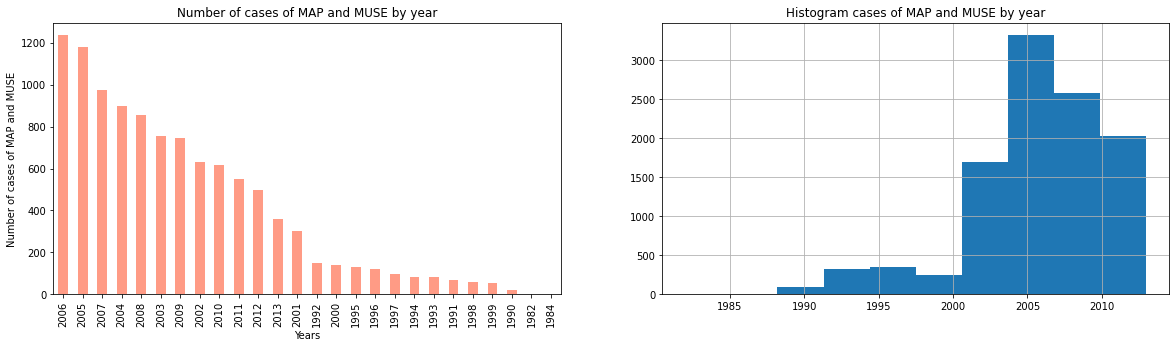

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(121)
colores = ["#FF9B85"] #"#60D394" green,"#FF9B85" pink "#EE6055" red, "#FFD97D" yellow
years.plot(kind = 'bar',color = colores)
plt.xlabel('Years')
plt.ylabel('Number of cases of MAP and MUSE')
plt.title('Number of cases of MAP and MUSE by year')

plt.subplot(122)
Xdata["Año"].hist()
plt.title('Histogram cases of MAP and MUSE by year')
plt.show()

##### Status of people affected by MAP in Colombia

- By means of the correlation between latitude and longitude, the state (Dead, Injured) of the people affected by MAP or MUSE is located in Colombia.

No handles with labels found to put in legend.


<Figure size 3000x2100 with 0 Axes>

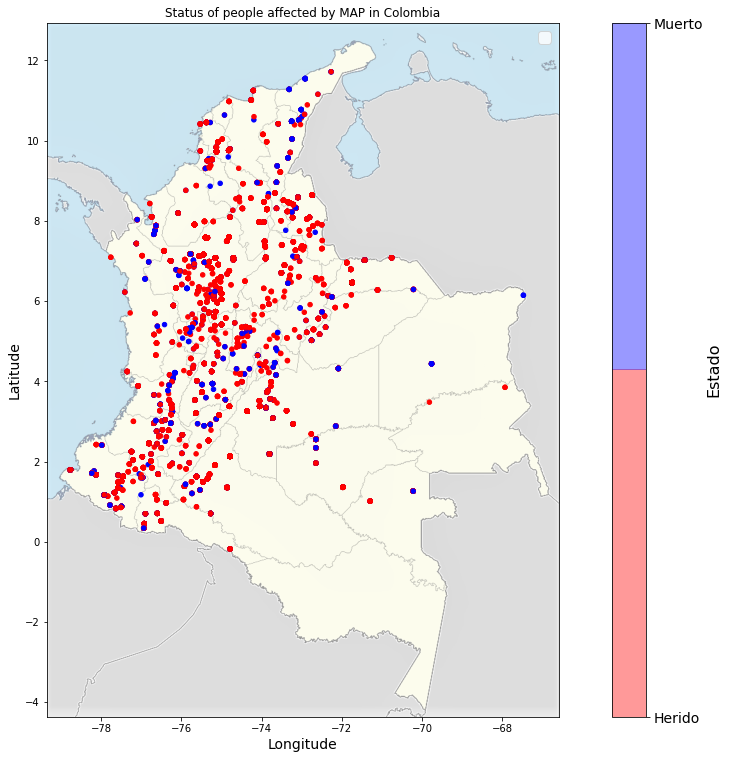

In [ ]:
import matplotlib.image as mpimg
colombia_img=mpimg.imread('colombia.png')   ## https://es.wikipedia.org/wiki/Plantilla:Mapa_de_localizaci%C3%B3n_de_Colombia_continental
import matplotlib.pyplot as plt
import matplotlib.colors

prices = (Xdata["Estado"]=="Muerto")

plt.figure(figsize = (15,10.5),dpi = 200)
cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
ax = Xdata.plot(kind="scatter", x="Longitud_cabecera", y="Latitud_cabecera", figsize=(15,10.5),
                  c=prices,cmap=cmap,colorbar=False)

plt.imshow(colombia_img, extent=[-79.349,-66.591,-4.364,12.934], alpha=0.4, cmap=cmap)
labels = np.array(["Muerto","Herido"])
cbar = plt.colorbar(ticks=range(2))
cbar.set_label('Estado', fontsize=16)
cbar.ax.set_yticklabels(['Herido', 'Muerto'],fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.tight_layout()
# plt.savefig('results/california_housing_prices_plot.pdf', format='pdf', dpi=300)
plt.title('Status of people affected by MAP in Colombia')
plt.show()

##### Circular diagram of the attributes of interest

The attributes of interest in this case are:
- Type of event: MAP or MUSE
- Status: Dead or Injured
- Condition
- Age Range

In [ ]:
def pastel(Xdata,atributo):

  features =Xdata[atributo].unique()

  ohe=pd.get_dummies(Xdata[atributo])

  cantidad = (ohe[features[0]]==1).sum()
  manzanas = [cantidad,(ohe[features[0]]==0).sum()]
  nombres = [features[0],features[1]]
  colores = ["#EE6055","#60D394"]
  plt.pie(manzanas, labels=nombres, autopct="%0.1f %%", colors=colores)
  print("El número de casos de " + features[0],  cantidad)


El número de casos de Herido 8456
El número de casos de Fuerza pública 6503
El número de casos de Mayor de 18 años 9556
El número de casos de Accidente por MAP 10132


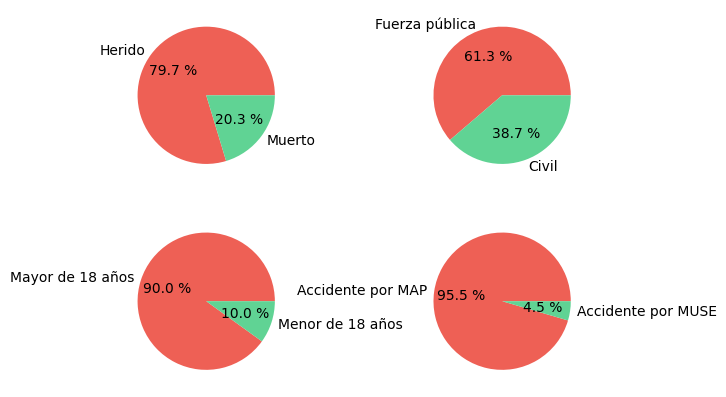

In [ ]:
plt.figure(figsize = (7,5),dpi = 100)
plt.subplot(221)
pastel(Xdata,"Estado")
plt.subplot(222)
pastel(Xdata,"Condicion")
plt.subplot(223)
pastel(Xdata,"Rango de edad")
plt.subplot(224)
pastel(Xdata,"Tipo de evento")


##### Correlation between attributes

- Corr_max
- Heat map
- Hist de corr_max

- The corr function showing all correlations between attributes is applied.


In [ ]:
corr_matrix = X.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Tipo de evento,Departamento,Año,Mes,Tipo de area,Rango de edad,Condicion,Estado,Genero,Latitud_cabecera,Longitud_cabecera
Tipo de evento,1.000000,0.084513,-0.137640,-0.022817,0.340425,0.348763,0.270094,0.036605,0.172670,0.000594,-0.021087
Departamento,0.084513,1.000000,-0.121555,-0.023739,0.072362,0.040298,-0.022492,0.098630,0.025931,0.013631,0.130320
Año,-0.137640,-0.121555,1.000000,-0.072997,-0.171943,-0.043832,0.003697,-0.087038,-0.062370,-0.213932,-0.172628
Mes,-0.022817,-0.023739,-0.072997,1.000000,0.031261,-0.024351,-0.043033,0.003556,-0.021051,0.001837,-0.025457
Tipo de area,0.340425,0.072362,-0.171943,0.031261,1.000000,0.166137,0.125353,0.003320,0.097904,0.049867,0.014561
Rango de edad,0.348763,0.040298,-0.043832,-0.024351,0.166137,1.000000,0.418199,0.010528,0.226415,-0.010199,-0.026611
Condicion,0.270094,-0.022492,0.003697,-0.043033,0.125353,0.418199,1.000000,-0.022026,0.299436,-0.012926,-0.080450
Estado,0.036605,0.098630,-0.087038,0.003556,0.003320,0.010528,-0.022026,1.000000,0.003057,0.008849,-0.004308
Genero,0.172670,0.025931,-0.062370,-0.021051,0.097904,0.226415,0.299436,0.003057,1.000000,-0.013773,-0.004172
Latitud_cabecera,0.000594,0.013631,-0.213932,0.001837,0.049867,-0.010199,-0.012926,0.008849,-0.013773,1.000000,0.388790


- Heatmap of the attribute correlation matrix.

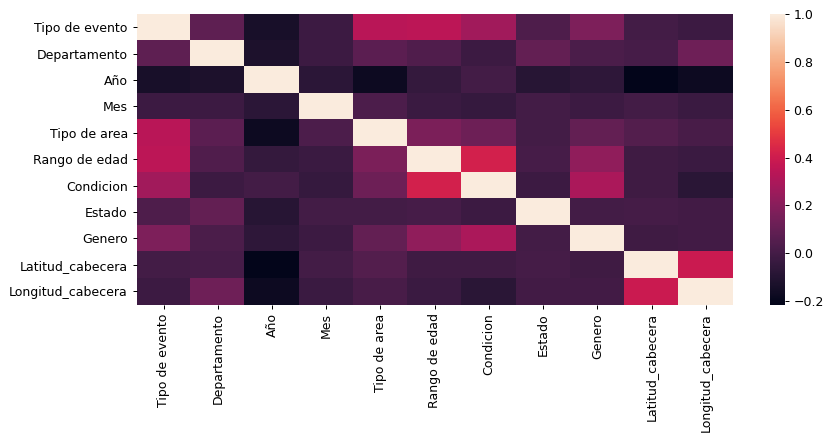

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,5), dpi = 90)
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.show()

- Histograms of the attributes.

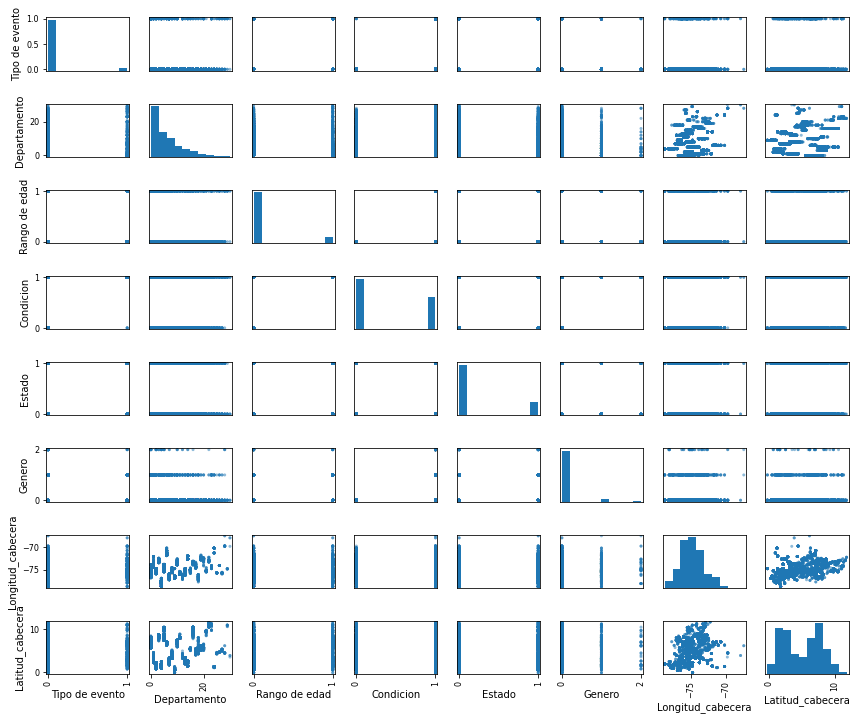

In [ ]:
from pandas.plotting import scatter_matrix

attributes = [ "Tipo de evento",	"Departamento","Rango de edad",	"Condicion",	"Estado",	"Genero",
              	"Longitud_cabecera",	"Latitud_cabecera"]

scatter_matrix(X[attributes], figsize=(12, 10))
plt.tight_layout()
plt.show()


- From the histograms and the correlation between attributes performed previously, it is observed that there is very low correlation between attributes, only Logitude, Latitude and Department show some correlation.

 For this reason, it was decided to generate two new attributes based on the probability of occurrence of an APM given a department over time.

## **Pre-Process: Generation of two new attributes from the conditional probability**


For this it is first necessary to extract the values of the number of cases in each department for each year.

To do this, the database is searched looking for the categories of department and year in each sample to assign them to a matrix.


In [ ]:
Dpts = ["ANTIOQUIA", "META", "CAQUETA", "NORTE DE SANTANDER", "NARIÑO", "BOLIVAR", "ARAUCA", "CAUCA", "TOLIMA", "PUTUMAYO", "SANTANDER", "CORDOBA",
       "VALLE DEL CAUCA", "HUILA", "GUAVIARE", "CALDAS", "CESAR", "CUNDINAMARCA", "CHOCO", "CASANARE", "BOYACA", "SUCRE", "LA GUAJIRA",
       "MAGDALENA","VAUPES", "QUINDIO", "BOGOTA DC", "RISARALDA", "VICHADA", "ATLANTICO", "GUAINIA"]

años = [1990,2013]  #min and max year



In [ ]:
## this code is only for checking the counter
def contadores2(Xdata,Años,dpto):
  acu = 0
  casosDpt = 0
  Años = list(range(Años[0],Años[1]+1))     ## the list of years is generated
  NAños = len(Años)                         ## number of years
  acu2 =  np.zeros((NAños,12))              ## Matrix with months per column and years per row

  for i in range(NAños):                    ## THE YEARS GO BY
    for ii in range(12):                    ## THE MONTHS GO BY

      casosDpt = ((Xdata["Departamento"] == dpto) & (Xdata["Año"] == Años[i]) & (Xdata["Mes"] == ii+1)).sum() / (Xdata["Departamento"] == dpto).sum()  ## sum of how many data meet this condition
      acu2[i][ii] = casosDpt
      acu = acu + casosDpt

  print(acu2), print(acu), print(acu2.sum())
  return acu2



## Function to organize data in rows according to a window
def sliding_window(l, w):
    if w > len(l):
        raise ValueError("Window size must be smaller or equal to the number of elements in the list.")
    t = []
    y = []
    an = len(l)-w
    i = 0
    while i< an:
      t.append(l[i:w+i])
      y.append(l[w+i])
      i += 1
    #print(an), print(len(t))
    return t, y


**Time series based on the probability of occurrence of an anti-personnel mine in Antioquia from 1990 to 2013**.

The conditional probability of mine occurrence given a department over a time span of 24 years is found for this case:


$$ P(X | D_M) = \frac{P(X \cap D_M)}{P(D)}  $$

$$ P(D_M) = P(D \cap A \cap M) $$

Where:

* $ $ P(D) $ represents the probability department.
* P(D_M) $ represents the probability department given a time
* A: Years
* M: Months

The above equation is merely theoretical, but for this case study the calculation of the conditional probability was done by counting.

In [ ]:
Xcal1 = contadores2(Xdata,años,"ANTIOQUIA")
Xcal1.shape[0] * Xcal1.shape[1]

[[0.00042626 0.         0.         0.         0.         0.00383632
  0.         0.         0.0029838  0.         0.         0.        ]
 [0.         0.         0.         0.00085251 0.         0.
  0.         0.         0.00085251 0.00085251 0.         0.        ]
 [0.00170503 0.00085251 0.00042626 0.         0.         0.00042626
  0.         0.00127877 0.00170503 0.00042626 0.00085251 0.        ]
 [0.00085251 0.         0.00042626 0.00127877 0.00085251 0.
  0.         0.         0.0029838  0.         0.00127877 0.        ]
 [0.00085251 0.         0.00042626 0.         0.         0.
  0.         0.00042626 0.00042626 0.         0.00127877 0.        ]
 [0.00085251 0.00042626 0.         0.00085251 0.         0.00170503
  0.00127877 0.         0.00682012 0.00085251 0.00042626 0.0029838 ]
 [0.00127877 0.00170503 0.         0.00085251 0.00085251 0.00042626
  0.00042626 0.         0.00213129 0.00042626 0.00170503 0.        ]
 [0.         0.         0.         0.00042626 0.         0.004262

288

In [ ]:
mylist = Xcal1[:][:].reshape(1,-1).flatten().tolist() ## converts the entire matrix into a vector
w= 6
Xcal2, Ycal2  = sliding_window(mylist, w)  #is sent to the function as a vector and returns 2 lists
Xcal2 = np.array(Xcal2)    #the data list is converted into an array type matrix
Ycal2 = np.array(Ycal2)
#print(Xcal2[270:282][:]), print(Ycal2[270:282])
# Ycal2.shape, Xcal2.shape, Ycal2[281], Xcal2[281]
print(Xcal2),print(Ycal2)

[[0.00042626 0.         0.         0.         0.         0.00383632]
 [0.         0.         0.         0.         0.00383632 0.        ]
 [0.         0.         0.         0.00383632 0.         0.        ]
 ...
 [0.00213129 0.00213129 0.00511509 0.00255754 0.00085251 0.0029838 ]
 [0.00213129 0.00511509 0.00255754 0.00085251 0.0029838  0.0029838 ]
 [0.00511509 0.00255754 0.00085251 0.0029838  0.0029838  0.00127877]]
[0.         0.         0.0029838  0.         0.         0.
 0.         0.         0.         0.00085251 0.         0.
 0.         0.         0.00085251 0.00085251 0.         0.
 0.00170503 0.00085251 0.00042626 0.         0.         0.00042626
 0.         0.00127877 0.00170503 0.00042626 0.00085251 0.
 0.00085251 0.         0.00042626 0.00127877 0.00085251 0.
 0.         0.         0.0029838  0.         0.00127877 0.
 0.00085251 0.         0.00042626 0.         0.         0.
 0.         0.00042626 0.00042626 0.         0.00127877 0.
 0.00085251 0.00042626 0.         0.00085

(None, None)

0.02600170502983802
2004 10 this date plus 6 months corresponds to the month with the most MAP cases.


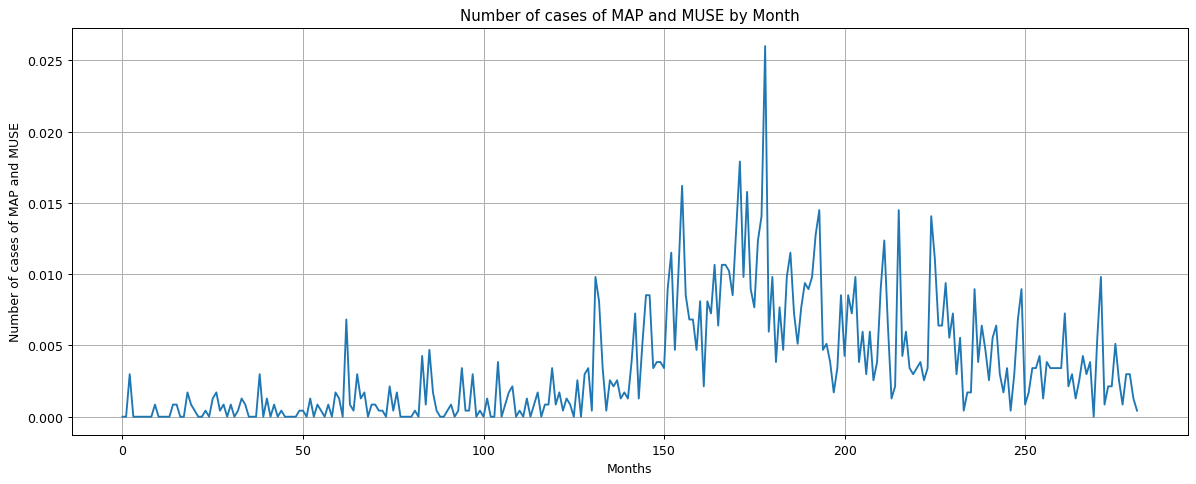

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (16,6), dpi = 90)
plt.plot(Ycal2)
plt.xlabel('Months')
plt.ylabel('Number of cases of MAP and MUSE')
plt.title('Number of cases of MAP and MUSE by Month')
plt.grid()

maxY = Ycal2.max()
print(maxY)
mesmax =  int(np.where(Ycal2 == maxY)[0]) - int((np.where(Ycal2 == maxY)[0])/12)*12
añosmax =  1990 + int((np.where(Ycal2 == maxY)[0])/12)
print(añosmax, mesmax, "this date plus 6 months corresponds to the month with the most MAP cases.")

## check we have to add the months of the window, since Y is ahead that amount of months and X is behind, so we have to
## advance X that amount

RealFecha = ((Xdata["Departamento"] == "ANTIOQUIA") & (Xdata["Año"] == 2005) & (Xdata["Mes"] == 5)).sum() /2346
# print(Ycal2)

In [ ]:
A = Xdata["Año"].value_counts()
print("el numero de casos desde el 2000 son: ", [A.loc[int(i+2000)] for i in range(13)])

el numero de casos desde el 2000 son:  [138, 300, 632, 757, 897, 1182, 1235, 977, 855, 746, 616, 550, 498]


# **Regression Model**

Definition of the parameters for regression.

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as msa
from sklearn import svm
from sklearn.svm import SVR

steps = [
          [('scaler', StandardScaler()), ('reg',  KernelRidge(kernel = 'rbf'))], #nonlinear regressor

          [('scaler', StandardScaler()), ('reg',  SVR(kernel = 'linear'))],

          [('scaler', StandardScaler()),('reg', KNeighborsRegressor())],

          [('scaler',StandardScaler()),('reg',Lasso())],

          [('scaler',StandardScaler()),('reg',ElasticNet())]
         ]

#parameters to search by grid search
parameters =[
             {'reg__gamma':[1e-3,1e-2,1e-1,1,10],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10]
             },
             {
             'reg__epsilon':[1e-3,1e-2,1e-1,1,10],
             'reg__C':[1e-3,1e-2,1e-1,1,10]
             },
             {
              'reg__n_neighbors': [ 1, 3, 5], #parameters n_neighbors must always be an int
             },

             {
              'reg__alpha': [0,1e-3,1e-2,1e-1,1,10] #For lasso
             },
             {
              'reg__alpha': [0,1e-3,1e-2,1e-1,1,10], #Elastic parameters
              'reg__l1_ratio':[0,0.25,0.5,0.75,1]
             }
              ]

label_model = ['SC_KRBF','SC_SVR_Linear','SC_KNN', 'SC_Lasso', 'SC_ElasticNet']

- **Training on Xtrain**

In [ ]:
# Time-preserving data partitioning
Xtrain = Xcal2[:197]
Xtest = Xcal2[197:]

Ytrain = Ycal2[:197]
Ytest = Ycal2[197:]
Ytrain.shape, Ytest.shape

((197,), (85,))

### Cross-validation

In [ ]:
# nested cross-validation
Niter = 10 #number of partitions outer loop outer loop outer loop nested cross validation
msev =np.zeros((Niter,len(steps)))#arrangement to save the hit
Nmod = len(steps) #number of models to be tested
best_estimators = Niter*[None]#best method by iteration
###key to performance
best_hyperpar = Niter*[None]#best method by iteration
#############################
for j in range(Niter): #outter loop
      #print('it %d/%d'%(j+1,Niter))
      #partitioning outter loop data
      X_train, X_test, y_train, y_test = train_test_split(Xtrain,Ytrain,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #inner loop list to store best estimator per model for iteration j
      list_hyper = [] #inner loop list to store best hyperparameters per model for iteration j
      for r in range(Nmod): #I run through all possible models to be tested in iteration j of the outter loop
          grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r],cv=5,verbose=5,scoring='neg_mean_absolute_error',n_jobs=5) #cv inner loop
          #generate better model
          grid_search.fit(X_train,y_train) # inner loop is performed inside the gridsearch
          #estimate outter loop test set output
          y_pred = grid_search.best_estimator_.predict(X_test)
          #Save best model
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #Save Hit
          msev[j,r] = msa(y_test,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('msa:',msev[j,r])

      best_estimators[j] = list_est #Save the best models
      best_hyperpar[j] = list_hyper #Save hyperparameters


      savedata = {
          'acc':msev,
          'best_models':best_estimators,
          'best_parameters':best_hyperpar,
            }

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Done 102 tasks      | elapsed:    2.6s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    2.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 1/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.01}
msa: 0.0017146664373958616
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 116 out of 125 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    1.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 1/10-Modelo 2/5
best hyper {'reg__C': 0.001, 'reg__epsilon': 0.001}
msa: 0.0017079662952802716
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 1/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.0016936629724353506
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005102484217777371, tolerance: 2.6001914576382847e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Par

it 1/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0017978337564575008
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0006705811662647091, tolerance: 2.6001914576382847e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.1s


it 1/10-Modelo 5/5
best hyper {'reg__alpha': 1, 'reg__l1_ratio': 0}
msa: 0.0019141007434408212
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 2/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.1}
msa: 0.00160200675267199
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done  90 out of 125 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coord

it 2/10-Modelo 2/5
best hyper {'reg__C': 0.001, 'reg__epsilon': 0.001}
msa: 0.001650232351664274
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 2/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.0014776925262858763
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 2/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0016503868518541328
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00052543658162216, tolerance: 2.690890629207427e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 2/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0016334380652802201
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s


it 3/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.1}
msa: 0.0016573084436425237
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s


it 3/10-Modelo 2/5
best hyper {'reg__C': 0.1, 'reg__epsilon': 0.001}
msa: 0.0016175838665394154
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 3/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.0015032679738562092
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005324169890160149, tolerance: 2.8262709596080046e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 3/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0016065282344941705
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005614992953157359, tolerance: 2.8262709596080046e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 3/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0015780847318377991
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 4/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.1}
msa: 0.00165506398927436
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 116 out of 125 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    1.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 4/10-Modelo 2/5
best hyper {'reg__C': 0.01, 'reg__epsilon': 0.001}
msa: 0.0017737989359980532
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 4/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.0017917021881216258
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not

it 4/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.001828229279778389
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005075084277488688, tolerance: 2.6167535921436874e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  13 tasks      | elapsed:    0.1s


it 4/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0018280123472158444
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 5/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.1}
msa: 0.0015749707660358283
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 116 out of 125 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    1.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estim

it 5/10-Modelo 2/5
best hyper {'reg__C': 0.001, 'reg__epsilon': 0.001}
msa: 0.0016141973561909718
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 5/10-Modelo 3/5
best hyper {'reg__n_neighbors': 3}
msa: 0.0017192384200056835
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 5/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0017786784839030237
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004961372885386639, tolerance: 2.9531102789407746e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 5/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0017129676830020927
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.1s


it 6/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.01}
msa: 0.0015910062832447068
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s


it 6/10-Modelo 2/5
best hyper {'reg__C': 0.001, 'reg__epsilon': 0.001}
msa: 0.0017195502331698344
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 6/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.001432225063938619
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004625000901352153, tolerance: 2.6895352078857946e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed:    0.1s


it 6/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0018435246715041611
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004971665499142657, tolerance: 2.6895352078857946e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.0s


it 6/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0017801630035753115
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 116 out of 125 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed:    0.1s


it 7/10-Modelo 1/5
best hyper {'reg__alpha': 0.1, 'reg__gamma': 0.1}
msa: 0.002095989389658547
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 116 out of 125 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    2.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s


it 7/10-Modelo 2/5
best hyper {'reg__C': 0.1, 'reg__epsilon': 0.001}
msa: 0.002155610914572995
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 7/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.002054560954816709
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003742230290164121, tolerance: 2.1049295251734185e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s


it 7/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.002073121339298742
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00039547767642860105, tolerance: 2.1049295251734185e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s


it 7/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0020620110669253414
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 8/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.1}
msa: 0.0017445187038271708
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 116 out of 125 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    2.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  14 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coord

it 8/10-Modelo 2/5
best hyper {'reg__C': 0.1, 'reg__epsilon': 0.001}
msa: 0.0017179985154923778
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 8/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.001642512077294686
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 8/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0018086973309739461
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005006867172617702, tolerance: 2.6967128401682457e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s


it 8/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0017805191661891078
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 116 out of 125 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s


it 9/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.1}
msa: 0.0019376411387197513
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done  90 out of 125 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    1.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s


it 9/10-Modelo 2/5
best hyper {'reg__C': 0.01, 'reg__epsilon': 0.001}
msa: 0.0019637541970362036
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 9/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.0017092924126172208
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00039180127274007683, tolerance: 2.2643281335923208e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s


it 9/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0019208307595116327
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00040973563846346823, tolerance: 2.2643281335923208e-07
  positive)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  11 tasks      | elapsed:    0.1s


it 9/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0019285422818766538
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    0.4s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s


it 10/10-Modelo 1/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0.01}
msa: 0.002028201189658554
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    1.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  28 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:354: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is disco

it 10/10-Modelo 2/5
best hyper {'reg__C': 0.001, 'reg__epsilon': 0.001}
msa: 0.002153463172460923
Fitting 5 folds for each of 3 candidates, totalling 15 fits
it 10/10-Modelo 3/5
best hyper {'reg__n_neighbors': 5}
msa: 0.001838590508667235
Fitting 5 folds for each of 6 candidates, totalling 30 fits
it 10/10-Modelo 4/5
best hyper {'reg__alpha': 0}
msa: 0.0022503203148268526
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Done  11 tasks      | elapsed:    0.1s


it 10/10-Modelo 5/5
best hyper {'reg__alpha': 0.1, 'reg__l1_ratio': 0}
msa: 0.0022024068311894424


[Parallel(n_jobs=5)]: Done 110 out of 150 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00038670177823571305, tolerance: 2.2378775241612068e-07
  positive)


###Choice of the best model:


- Since the mean absolute error is a way of quantifying the performance of each model, the box plot of the absolute error of each model is plotted and it is observed that for this database the best model is KernelRidge, since it is the one with the lowest variability with respect to the median and it is evident that it is not biased.
- Since the mean absolute error is a way of quantifying the performance of each model, the box plot of the absolute error of each model is plotted and it is observed that for this database the best model is KernelRidge, since it is the one with the lowest variability with respect to the median and it is evident that it is not biased.


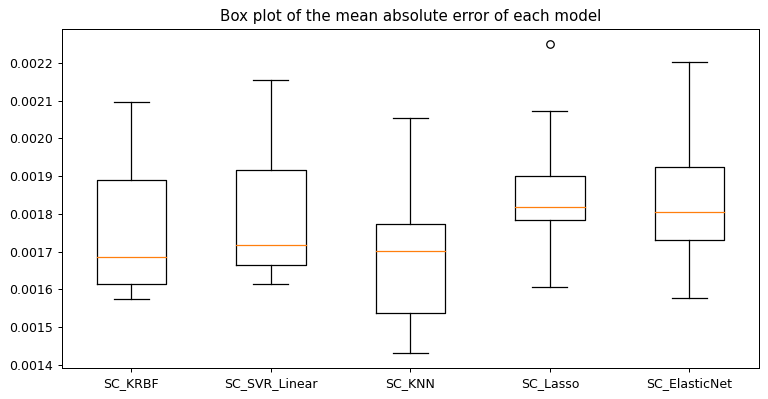

In [ ]:
plt.figure(figsize = (10,5), dpi = 90)
plt.boxplot(msev)
plt.xticks(ticks=np.arange(len(steps))+1,labels=label_model)
plt.title('Box plot of the mean absolute error of each model')
plt.show()

###Parameter tuning

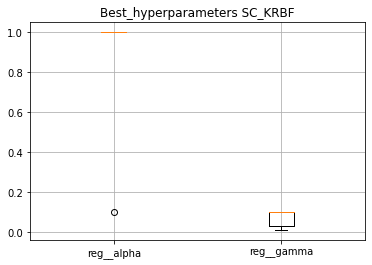

SC_KRBF bestparameter [1.  0.1]


In [ ]:
from scipy.stats import mode
from datetime import date

r = 0
nh = len(best_hyperpar[0][r])
hyperpar_r = np.zeros((Niter,nh))
for i in range(Niter):
  for j in range(nh):
    hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])


  #check whole number for casting
aa = list(best_hyperpar[0][r].keys())
c = -1

for i in range(len(aa)):
  if aa[i].find('n_neighbors') > -1:
    c = i

mode_hyper = mode(hyperpar_r,axis=0)[0][0]
plt.boxplot(hyperpar_r)
plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
plt.title('Best_hyperparameters '+label_model[r])
plt.grid()
plt.show()
print(label_model[r],"bestparameter",mode_hyper)


In [ ]:
mode_hyper

array([1. , 0.1])

###Training with final model

####Xtrain and Ytrain training

In [ ]:
#Training with the best hyperparameters
model_f = Pipeline(steps[r])
paramsf = parameters[r]
hyperl = list(parameters[r].keys())
nh = len(hyperl)


for j in range(nh):
  if j == c:
    paramsf[hyperl[j]] = int(mode_hyper[j])
  else:
     paramsf[hyperl[j]] = mode_hyper[j]

model_f.set_params(**paramsf)
model_f.fit(Xtrain,Ytrain)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=1.0,
                             kernel='rbf', kernel_params=None))],
         verbose=False)

#####Prediction

Mean absolute error 0.0013216725094013298


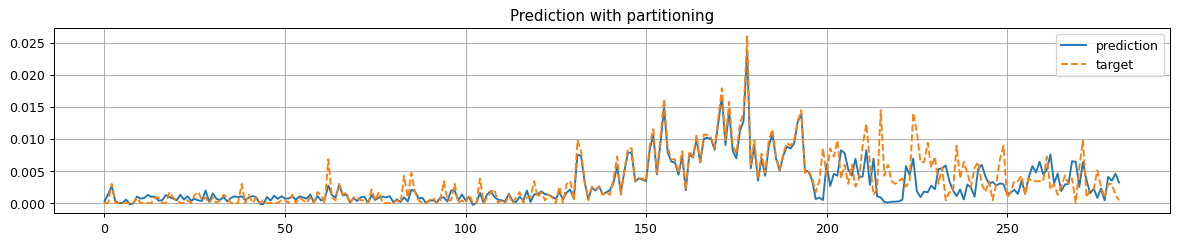

In [ ]:
#Graph
plt.figure(figsize = (16,6), dpi = 90)

Ypredict = model_f.predict(Xcal2)
error = Ycal2 - Ypredict
print('Mean absolute error',msa(Ycal2,Ypredict))


plt.subplot(211)
plt.plot(Ypredict,label='prediction')
plt.plot(Ycal2,'--',label='target')
plt.grid()
plt.title('Prediction with partitioning')
plt.legend()


####Training with all trained data

In [ ]:
#Training with the best hyperparameters
model_f = Pipeline(steps[r])
paramsf = parameters[r]
hyperl = list(parameters[r].keys())
nh = len(hyperl)


for j in range(nh):
  if j == c:
    paramsf[hyperl[j]] = int(mode_hyper[j])
  else:
     paramsf[hyperl[j]] = mode_hyper[j]

model_f.set_params(**paramsf)
model_f.fit(Xcal2,Ycal2)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 KernelRidge(alpha=0.1, coef0=1, degree=3, gamma=1.0,
                             kernel='rbf', kernel_params=None))],
         verbose=False)

#####Prediction

Mean absolute error 0.0005930778475331055


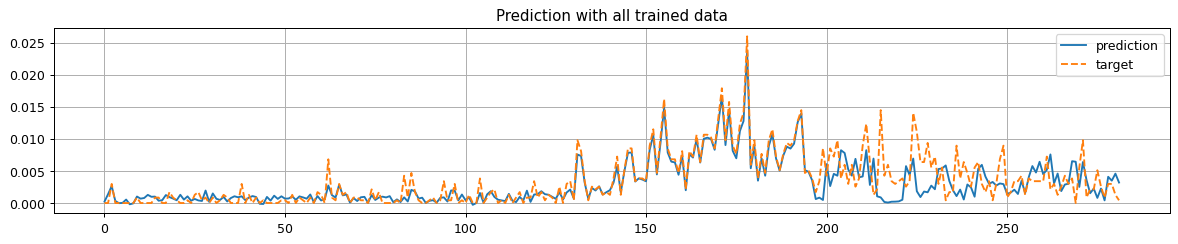

In [ ]:
#Graph
plt.figure(figsize = (16,6), dpi = 90)

Ypredict1 = model_f.predict(Xcal2)
error1 = Ycal2 - Ypredict1
print('Mean absolute error',msa(Ycal2,Ypredict1))

plt.subplot(211)
plt.plot(Ypredict,label='prediction')
plt.plot(Ycal2,'--',label='target')
plt.grid()
plt.title('Prediction with all trained data')
plt.legend()


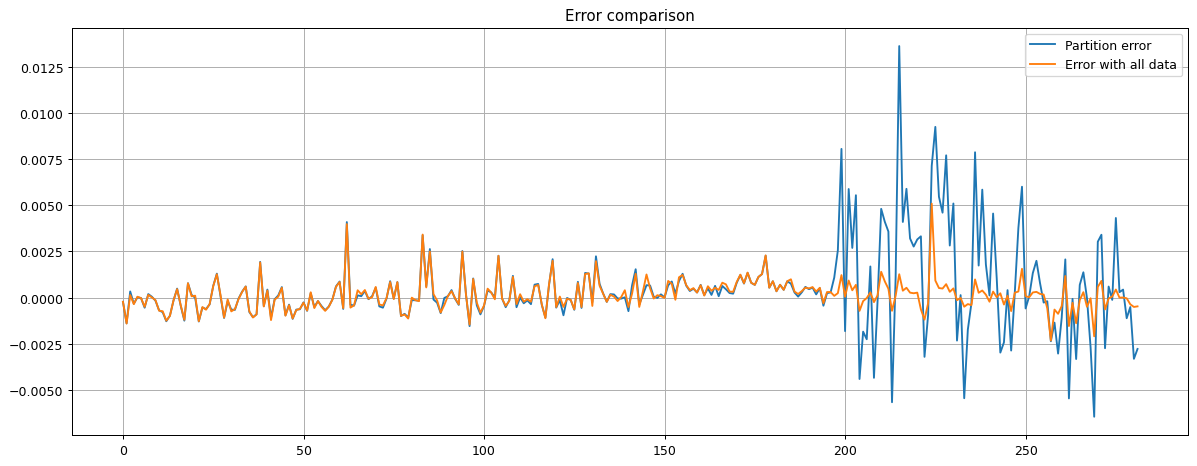

In [ ]:
plt.figure(figsize = (16,6), dpi = 90)

plt.plot(error,label='Partition error')
plt.plot(error1,label='Error with all data')
plt.grid()
plt.title('Error comparison')
plt.legend()

It is predicted using the model trained with Xtrain and Ytrain, i.e. with 70% of the data respecting temporality, but evaluating it on all Xcal2 and Ycal2 data. So it is evident that there is a high error in the prediction from 70% of the data (months > month #197), this is because the amount of data with which it is trained is a fraction of the total data, which in itself are already very few, therefore it is difficult for the model to make the prediction for data that it does not know, which would be the remaining 30%.

For this reason it is necessary to use all the data for training.

# Quality of the predictor


Validation of predictor quality by changing the window width for X and Y generation.


In [ ]:
def wep(w, mylist):

  Xcal2, Ycal2  = sliding_window(mylist, w)  #is sent to the function as a vector and returns 2 lists
  Xcal2 = np.array(Xcal2)    #the data list is converted into an array type matrix
  Ycal2 = np.array(Ycal2)

  #Training
  r = 0 #Kernelridge Road
  #Training with the best hyperparameters
  model_f = Pipeline(steps[r])
  paramsf = parameters[r]
  hyperl = list(parameters[r].keys())
  nh = len(hyperl)

  for j in range(nh):
    if j == c:
      paramsf[hyperl[j]] = int(mode_hyper[j])
    else:
      paramsf[hyperl[j]] = mode_hyper[j]

  model_f.set_params(**paramsf)
  model_f.fit(Xcal2,Ycal2)

  #predicción
  Ypredict = model_f.predict(Xcal2)
  error = Ycal2 - Ypredict

  #Gráfica
  plt.figure(figsize = (16,6), dpi = 90)
  plt.subplot(211)
  plt.plot(Ypredict,label='prediction')
  plt.plot(Ycal2,'--',label='target')
  plt.grid()
  plt.legend()

  plt.subplot(212)
  plt.plot(error,label='Error')
  plt.grid()
  plt.legend()
  plt.show()
  print('Mean absolute error',msa(Ycal2,Ypredict))

- Training and prediction with data obtained from a window w = 2


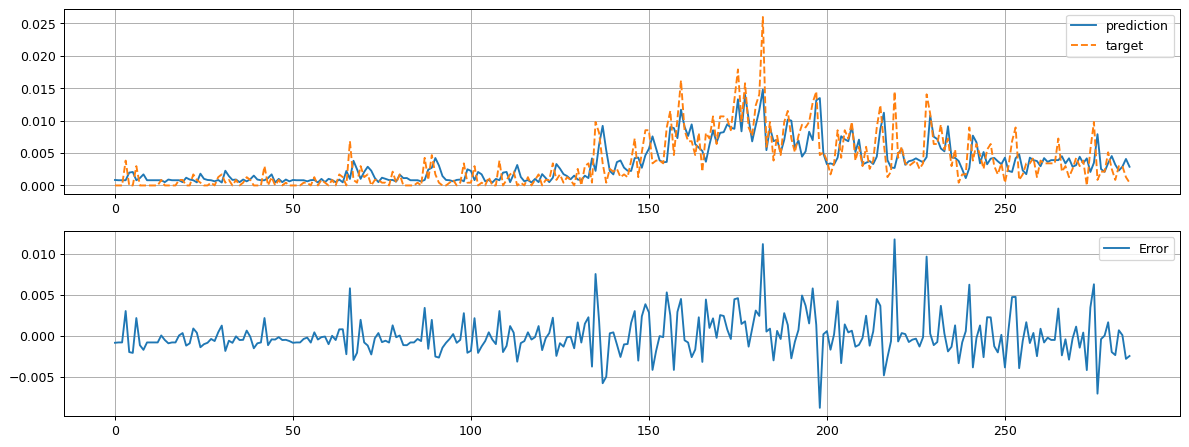

Mean absolute error 0.0016963681523975522


In [ ]:
wep(2, mylist)

- Training and prediction with data obtained from a window w = 4


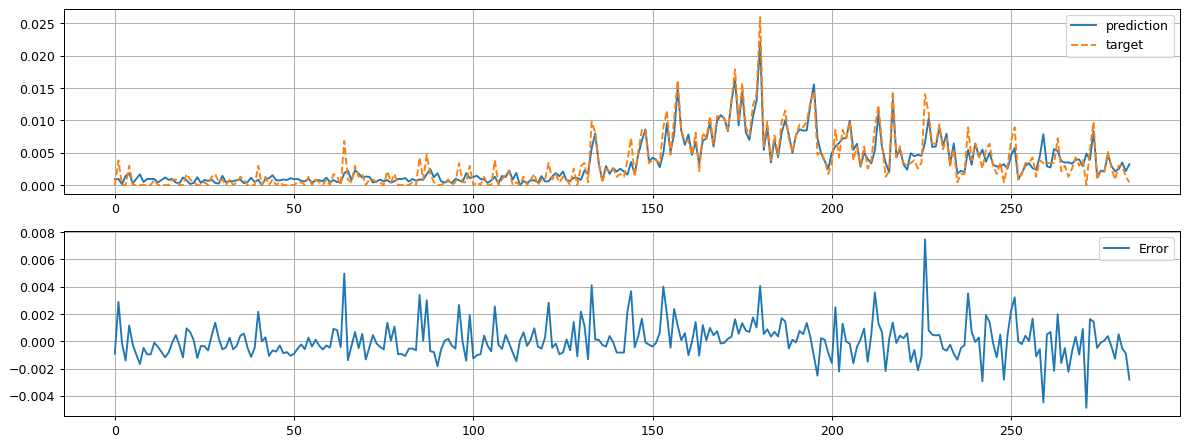

Mean absolute error 0.0009523576594138595


In [ ]:
wep(4, mylist)

- Training and prediction with data obtained from a window w = 8


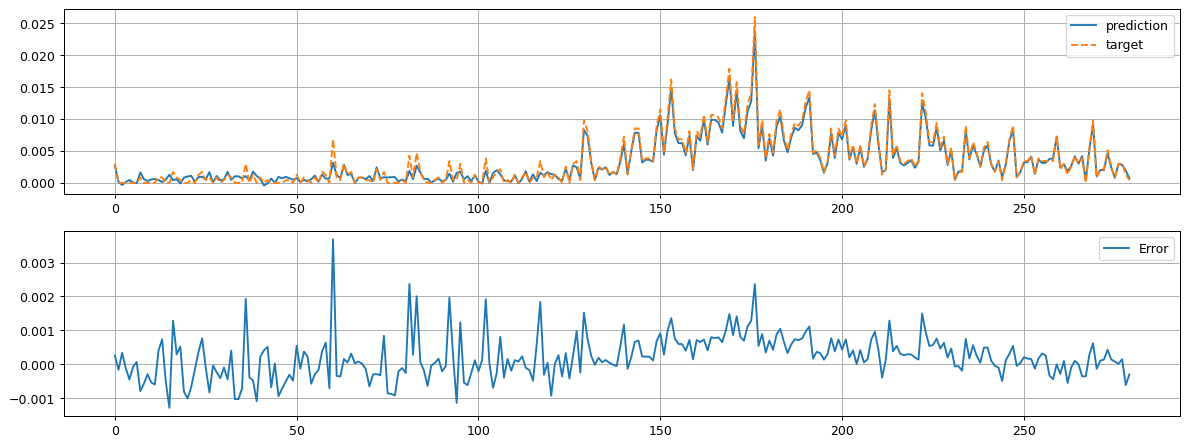

Mean absolute error 0.000494421561963291


In [ ]:
wep(8, mylist)

- Training and prediction with data obtained from a window w = 12

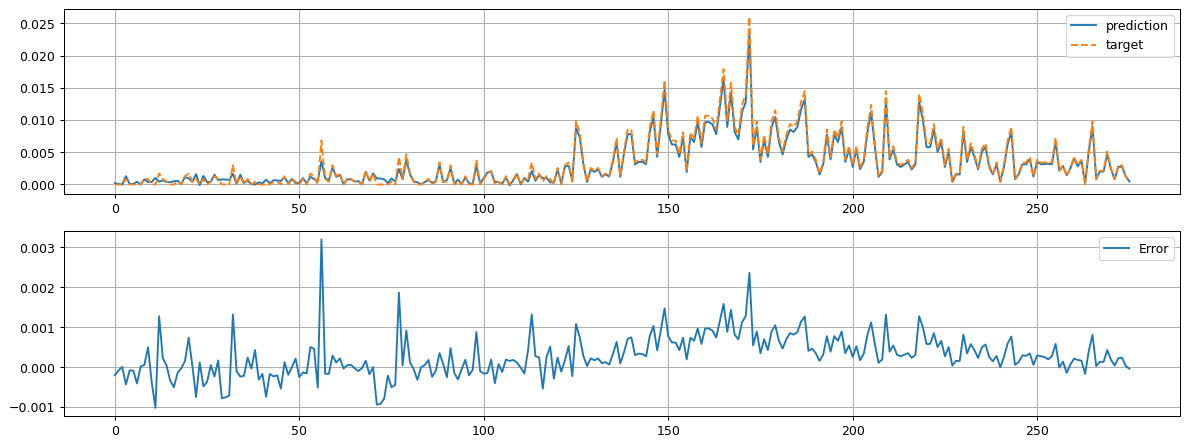

Mean absolute error 0.0004319596399790513


In [ ]:
wep(12, mylist)

### Remarks:

* It is observed how the width of the window defined by the `w` parameter has an inverse relationship with the mean absolute error, since it affects both the size of the segments and the amount of data in each one.

* It is evident that when modifying the width of the window, for values `w` < 4 the mean absolute error increases, because when the number of samples increases, that is, the number of partitions of the time series is greater, the size of the segments decreases, which implies a greater difficulty in making the prediction when there is not enough training data associated with each output "Y".

* It is important to be careful when assigning the value of the window, because although increasing this value can generate a lower mean absolute error, it could also cause negative effects on the accuracy of the predictor, implying that a larger amount of data is necessary to generate good results with the model.

#References.

[1] [Covid Notebook](https://github.com/amalvarezme/AnaliticaDatos/blob/master/2_PlantillaProyecto_EjRegresionGH/02S_S3_ValidacionCruzadaAnidada_covidCSV.ipynb).

[2] [Housing Notebook](https://github.com/amalvarezme/AnaliticaDatos/blob/master/2_PlantillaProyecto_EjRegresionGH/02S_2_Guia_LadoaLado.ipynb).

[3] [Workshop 1 FIFA](https://colab.research.google.com/drive/18ilVuDjxS7yP8rSTm5CQG7eFQhabxpcb?authuser=1).

[4] [Slides_01_02S_IntroAprendMaq](https://github.com/amalvarezme/AnaliticaDatos/blob/master/1_IntroRepasoGH/Slides_01_02S_IntroAprendMaq.pdf).

[5] []()
